<a href="https://colab.research.google.com/github/vikaskyiit/ML-Projects/blob/main/HandGrade_AI_Handwritten_Essay_Evaluation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Install required libraries
# These tools are used for embeddings, grammar checking, readability, ML, and plotting
!pip install -q sentence-transformers xgboost textstat language-tool-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

import textstat
import language_tool_python


In [3]:
#Upload Essay Dataset

df = pd.read_csv("ielts_writing_dataset.csv")

print("Dataset Loaded Successfully!")
print("Dataset Shape:", df.shape)
print("Columns in Dataset:", df.columns.tolist())
df.head()


✅ Dataset Loaded Successfully!
📊 Dataset Shape: (1435, 9)
📋 Columns in Dataset: ['Task_Type', 'Question', 'Essay', 'Examiner_Commen', 'Task_Response', 'Coherence_Cohesion', 'Lexical_Resource', 'Range_Accuracy', 'Overall']


,Task_Type,Question,Essay,Examiner_Commen,Task_Response,Coherence_Cohesion,Lexical_Resource,Range_Accuracy,Overall
0,1,The bar chart below describes some changes abo...,"Between 1995 and 2010, a study was conducted r...",NaN,NaN,NaN,NaN,NaN,5.5
1,2,Rich countries often give money to poorer coun...,Poverty represents a worldwide crisis. It is t...,NaN,NaN,NaN,NaN,NaN,6.5
2,1,The bar chart below describes some changes abo...,The left chart shows the population change hap...,NaN,NaN,NaN,NaN,NaN,5.0
3,2,Rich countries often give money to poorer coun...,Human beings are facing many challenges nowada...,NaN,NaN,NaN,NaN,NaN,5.5
4,1,The graph below shows the number of overseas v...,Information about the thousands of visits from...,NaN,NaN,NaN,NaN,NaN,7.0


In [4]:
# Uninstall old Java
!sudo apt-get remove openjdk*

# Install Java 17 (required by language_tool_python)
!sudo apt-get update
!sudo apt install openjdk-17-jdk

# Set Java 17 as default
!sudo update-alternatives --install /usr/bin/java java /usr/lib/jvm/java-17-openjdk-amd64/bin/java 1
!sudo update-alternatives --set java /usr/lib/jvm/java-17-openjdk-amd64/bin/java

# Confirm the version
!java -version



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'openjdk-11-jdk' for glob 'openjdk*'
Note, selecting 'openjdk-11-jre' for glob 'openjdk*'
Note, selecting 'openjdk-11-jre-headless' for glob 'openjdk*'
Note, selecting 'openjdk-19-jre-headless' for glob 'openjdk*'
Note, selecting 'openjdk-8-jre-zero' for glob 'openjdk*'
Note, selecting 'openjdk-11-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-21-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-19-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-21-demo' for glob 'openjdk*'
Note, selecting 'openjdk-18-jdk-headless' for glob 'openjdk*'
Note, selecting 'openjdk-17-dbg' for glob 'openjdk*'
Note, selecting 'openjdk-17-doc' for glob 'openjdk*'
Note, selecting 'openjdk-18-dbg' for glob 'openjdk*'
Note, selecting 'openjdk-17-jdk' for glob 'openjdk*'
Note, selecting 'openjdk-18-doc' for glob 'openjdk*'
Note, selecting 'openjdk-17-jre' for glob 'openjd

In [5]:
!pip install -q language-tool-python sentence-transformers xgboost textstat



In [19]:
!pip install -q easyocr sentence-transformers xgboost textstat language-tool-python pdf2image
!apt install -y poppler-utils  # For PDF to image conversion



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 27.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 0s (413 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126574 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking popp

In [6]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')
text = "This are a bad sentence. He do mistake."
matches = tool.check(text)

print(f"Grammar errors found: {len(matches)}")
for match in matches[:3]:  # Show first few matches
    print(f"🔸 {match.message}")


INFO:language_tool_python.download_lt:Unzipping /tmp/tmpuahcxrfn.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://internal1.languagetool.org/snapshots/LanguageTool-latest-snapshot.zip to /root/.cache/language_tool_python.


Grammar errors found: 3
🔸 The singular demonstrative pronoun ‘this’ does not agree with the plural verb ‘are’. Did you mean “these”?
🔸 The verb ‘are’ is plural. Did you mean: “is”? Did you use a verb instead of a noun?
🔸 The pronoun ‘He’ is usually used with a third-person or a past tense verb.


In [7]:
# Define Function to Extract Linguistic Features
# Features extracted:
#  Total word count
#  Number of sentences
#  Average sentence length
#  Readability score (Flesch Reading Ease)
#  Grammar error count

def extract_linguistic_features(text):
    word_count = len(text.split())
    sentence_count = text.count('.') + text.count('?') + text.count('!')
    avg_sentence_length = word_count / (sentence_count + 1)  # Avoid division by zero
    readability_score = textstat.flesch_reading_ease(text)
    grammar_errors = len(tool.check(text))

    return [word_count, sentence_count, avg_sentence_length, readability_score, grammar_errors]


In [9]:
#  Apply the above function to all essays
# This generates a feature set of shape (num_samples x 5)

linguistic_features = df['Essay'].apply(extract_linguistic_features)
linguistic_df = pd.DataFrame(linguistic_features.tolist(), columns=[
    'WordCount', 'SentenceCount', 'AvgSentenceLen', 'FleschScore', 'GrammarErrors'
])

print(" Linguistic Features Extracted. Shape:", linguistic_df.shape)
linguistic_df.head()


 Linguistic Features Extracted. Shape: (1435, 5)


,WordCount,SentenceCount,AvgSentenceLen,FleschScore,GrammarErrors
0,125,5,20.833333,37.978400,0
1,258,12,19.846154,51.226453,3
2,165,9,16.500000,61.070303,10
3,298,16,17.529412,42.009820,13
4,162,8,18.000000,53.114583,3


In [10]:

# Load Pre-trained Embedding Model
# We use 'all-mpnet-base-v2' for high-quality semantic representations of the essays
embedder = SentenceTransformer('all-mpnet-base-v2')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
# Generate Sentence Embeddings for Each Essay
print("Generating Embeddings... This may take a minute.")
essay_embeddings = embedder.encode(df['Essay'].tolist(), show_progress_bar=True)

print("Embeddings Shape:", essay_embeddings.shape)


Generating Embeddings... This may take a minute.


Batches:   0%|          | 0/45 [00:00<?, ?it/s]

Embeddings Shape: (1435, 768)


In [12]:
# Show column names
print("Columns in your dataset:")
print(df.columns.tolist())


Columns in your dataset:
['Task_Type', 'Question', 'Essay', 'Examiner_Commen', 'Task_Response', 'Coherence_Cohesion', 'Lexical_Resource', 'Range_Accuracy', 'Overall']


In [13]:
# Rename 'Overall' to 'Band' if needed
if 'Overall' in df.columns and 'Band' not in df.columns:
    df.rename(columns={'Overall': 'Band'}, inplace=True)


In [14]:
# Merge Embeddings with Linguistic Features
X = np.hstack((essay_embeddings, linguistic_df.values))
y = df['Band'].values  # Target output: IELTS Band score

print("Feature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)


Feature Matrix Shape: (1435, 773)
Target Vector Shape: (1435,)


In [15]:

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training/Test Split Completed")


Training/Test Split Completed


In [16]:
# Initialize and Train XGBoost Regressor
model = XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
print("Model Training Completed")


Model Training Completed


In [17]:

# Predict & Evaluate the Model

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation Metrics:")
print(f"🔹 RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"🔹 MAE  (Mean Absolute Error): {mae:.4f}")
print(f"🔹 R² Score (Explained Variance): {r2:.4f}")



 Model Evaluation Metrics:
🔹 RMSE (Root Mean Squared Error): 0.7903
🔹 MAE  (Mean Absolute Error): 0.5799
🔹 R² Score (Explained Variance): 0.3982


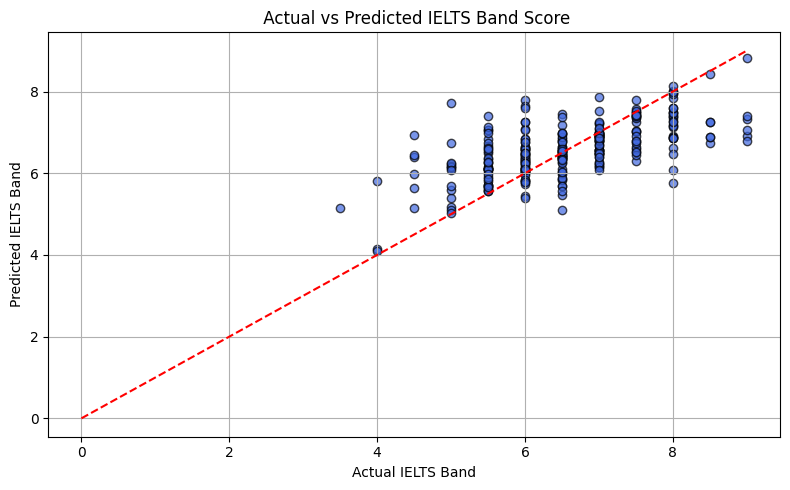

In [18]:

# Plot Actual vs Predicted Band Scores

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue', edgecolor='black')
plt.plot([0, 9], [0, 9], 'r--')
plt.xlabel("Actual IELTS Band")
plt.ylabel("Predicted IELTS Band")
plt.title(" Actual vs Predicted IELTS Band Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))


Saving mygov_1565854626483123.jpg to mygov_1565854626483123.jpg


In [22]:
import easyocr

# Initialize OCR reader
reader = easyocr.Reader(['en'])

# OCR the image
result = reader.readtext(filename, detail=0, paragraph=True)
handwritten_text = ' '.join(result)

print("Extracted Essay Text:")
print(handwritten_text[:500])  # Preview first 500 chars

Extracted Essay Text:
Aenve te inteqity % the mahm 7h 8iah+ Gqairs+ the enumiu wha uu to hatu Ino Yhun land Iy Aince MA mothr land is mk prride g will mWve1 a bide Hh < Huul and NuA ulaHa Ma d by my Awibs cuuu And jul blcause 6 Taults 9 w;lj nU1 Yahe them Zjojn t lu 9 houqh _ 'buinq A Aoldiu "t I no + an iy task t Ovuk cam and Jochlz eac cnd Qerud pho , blems Which Com u in md Path fut Xhli 9 wili t ~y levd bul , S+ % my pttom fe t myaug an d my matlm Concluusio Nevey dsuam {orc L Aucc but Wonk Kor i" 9 We duam b ecb


In [24]:
# Grammar and linguistic feature extraction
import textstat
import language_tool_python
import re

# Initialize grammar checker
tool = language_tool_python.LanguageTool('en-US')

# Function to extract linguistic and grammar features
def extract_features(text):
    word_count = len(text.split())
    sentence_count = len(re.findall(r'[.!?]', text))
    avg_sentence_length = word_count / (sentence_count + 1)
    readability_score = textstat.flesch_reading_ease(text)
    grammar_errors = len(tool.check(text))

    return [word_count, sentence_count, avg_sentence_length, readability_score, grammar_errors]


In [27]:
# Extract handcrafted linguistic features
essay_features = extract_features(handwritten_text)

#Generate sentence embedding
embedding = embedder.encode([handwritten_text])

# Combine features (embedding + linguistic)
X_hand = np.hstack((embedding, np.array(essay_features).reshape(1, -1)))

# Predict IELTS Band using trained model
predicted_band = model.predict(X_hand)[0]

# Output
print(f"\n Predicted Essay Score from Handwriting: {predicted_band:.2f}")





 Predicted Essay Score from Handwriting: 6.45
